In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [3]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Gender','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.isnull().sum() #returns all the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
import seaborn as sb

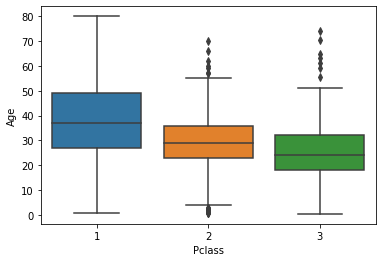

In [8]:
sb.boxplot(x='Pclass',y='Age',data=titanic)
#interquartile range(IQR); MaxMedian - MinMedian = (IQR)
#anything beyond 1.5*IQR would be considered as Outlier

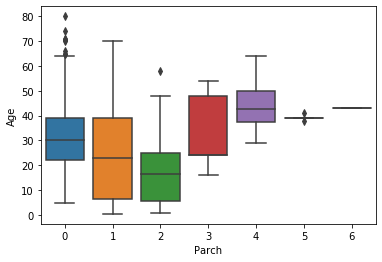

In [9]:
sb.boxplot(x='Parch',y='Age',data=titanic)

In [10]:
np.unique(titanic['Parch'])

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [11]:
titanic[titanic['Parch']==3]['Age'].median()

24.0

In [12]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [13]:
titanic['Age'] = titanic[['Age','Pclass']].apply(age_approx,axis=1)

In [14]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
titanic.drop('Cabin',axis=1,inplace=True)

In [16]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
titanic.dropna(inplace=True, axis=0)

In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [20]:
titanic

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
gender = pd.get_dummies(titanic['Gender'], drop_first=True)

In [22]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [23]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
titanic.drop(['Gender','Embarked'],axis=1,inplace=True)

In [26]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [27]:
titanic_dummy = pd.concat([titanic,gender,embark],axis=1)

In [28]:
titanic_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [29]:
X = titanic_dummy.iloc[:,1:9]

In [30]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [31]:
y = titanic_dummy.iloc[:,0:1]

In [32]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
X = np.matrix(X)
y = np.matrix(y)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 100)

In [36]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

In [37]:
lr = LogisticRegression() #Creating Object for logistic regression

In [38]:
lr.fit(X_train,y_train) #Gradient descent

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr.fit(X_train,np.array(y_train).ravel()) #Gradient descent by changing y to 1d array

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#Above:
#1)C is the regularization parameter
#2)'tol' is the tolerance level up until where the program should keep going
#3)We can specify the above values 'lr = LogisticRegression(C=100, tol = 0.0000001, max_iters = 10)'

In [41]:
lr.score(X_test,y_test) #Accuracy/ Test score

0.8033707865168539

In [42]:
print(lr.intercept_) #for theta0

[3.91637504]


In [43]:
print(lr.coef_) #for theta1, theta2, .....

[[-0.90272676 -0.02880761 -0.31197462 -0.00830879  0.0041942  -2.3881333
  -0.05191389 -0.05602247]]


In [44]:
titanic_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [45]:
lr.score(X_train,y_train) #Training score

0.7974683544303798

In [46]:
y_pred = lr.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [54]:
accuracy_score(y_test, y_pred)

0.8033707865168539

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4434289272060925